<a href="https://colab.research.google.com/github/ganeshsprofessional/sdc-GenAI/blob/main/housepriceprediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd  # For handling data
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For visualization
import seaborn as sns  # For better plots
from sklearn.model_selection import train_test_split  # Splitting data
from sklearn.preprocessing import StandardScaler  # Feature Scaling
from sklearn.ensemble import RandomForestRegressor  # ML Model
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score  # Model Evaluation


In [ ]:

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_samples = 1000  # Number of data points

square_feet = np.random.randint(800, 5000, num_samples)  # House size in sq. ft.
bedrooms = np.random.randint(1, 6, num_samples)  # 1 to 5 bedrooms
bathrooms = np.random.randint(1, 4, num_samples)  # 1 to 3 bathrooms
location_score = np.random.randint(1, 11, num_samples)  # Location quality score (1 to 10)

# Generate house prices based on features (random formula)
price = (square_feet * 300) + (bedrooms * 50000) + (bathrooms * 30000) + (location_score * 20000) + np.random.randint(-50000, 50000, num_samples)

# Create DataFrame
df = pd.DataFrame({
    'square_feet': square_feet,
    'bedrooms': bedrooms,
    'bathrooms': bathrooms,
    'location_score': location_score,
    'price': price
})

# Display the first few rows
print(df.head())

# Save to CSV (optional, in case you want to use it later)
df.to_csv("house_prices.csv", index=False)


   square_feet  bedrooms  bathrooms  location_score    price
0         1660         2          2              10   849458
1         4572         5          2               2  1760637
2         3892         1          2               3  1308713
3         1266         1          3              10   769777
4         4244         1          1               1  1413426


In [ ]:
print('hello')

hello


In [ ]:
df.info()  # Check data types and missing values
df.describe()  # Summary statistics
df.isnull().sum()  # Check for missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   square_feet     1000 non-null   int64
 1   bedrooms        1000 non-null   int64
 2   bathrooms       1000 non-null   int64
 3   location_score  1000 non-null   int64
 4   price           1000 non-null   int64
dtypes: int64(5)
memory usage: 39.2 KB


,0
square_feet,0
bedrooms,0
bathrooms,0
location_score,0
price,0


In [ ]:
df.fillna(df.median(), inplace=True)  # Fill missing values with the median


In [ ]:
X = df[['square_feet', 'bedrooms', 'bathrooms', 'location_score']]  # Features
y = df['price']  # Target variable (house price)


In [ ]:
X = pd.get_dummies(X, drop_first=True)  # One-hot encoding for categorical variables


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [ ]:
y_pred = model.predict(X_test)


In [ ]:
print("Mean Absolute Error:", mean_absolute_error(y_test, y_pred))
print("Mean Squared Error:", mean_squared_error(y_test, y_pred))
print("R-Squared Score:", r2_score(y_test, y_pred))


Mean Absolute Error: 35755.02149095238
Mean Squared Error: 1955224095.560671
R-Squared Score: 0.9839221492852545


In [ ]:
new_house = np.array([[1500, 3, 2, 8]])  # Example: 1500 sq.ft, 3 bedrooms, 2 bathrooms, location score 8
new_house = scaler.transform(new_house)  # Scale new data
predicted_price = model.predict(new_house)
print("Predicted Price:", predicted_price[0])


Predicted Price: 768110.79


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [ ]:
# Convert new data into a DataFrame with correct column names
new_house = pd.DataFrame([[1500, 3, 2, 8]], columns=['square_feet', 'bedrooms', 'bathrooms', 'location_score'])

# Scale new data using the same scaler
new_house_scaled = scaler.transform(new_house)

# Predict the price
predicted_price = model.predict(new_house_scaled)
print("Predicted Price:", predicted_price[0])


Predicted Price: 768110.79


In [ ]:
import pandas as pd
import numpy as np

# Creating new sample house data
new_houses = pd.DataFrame({
    'square_feet': [1200, 1800, 2500, 3000, 4000],
    'bedrooms': [2, 3, 4, 5, 5],
    'bathrooms': [1, 2, 3, 3, 4],
    'location_score': [5, 7, 8, 9, 10]
})

print(new_houses)


   square_feet  bedrooms  bathrooms  location_score
0         1200         2          1               5
1         1800         3          2               7
2         2500         4          3               8
3         3000         5          3               9
4         4000         5          4              10


In [ ]:
# Scale the new data (use the same scaler from training)
new_houses_scaled = scaler.transform(new_houses)

# Predict prices
predicted_prices = model.predict(new_houses_scaled)

# Add predictions to DataFrame
new_houses['Predicted Price'] = predicted_prices

# Show results
print(new_houses)


   square_feet  bedrooms  bathrooms  location_score  Predicted Price
0         1200         2          1               5        587395.64
1         1800         3          2               7        864529.85
2         2500         4          3               8       1146546.75
3         3000         5          3               9       1375569.86
4         4000         5          4              10       1656461.95


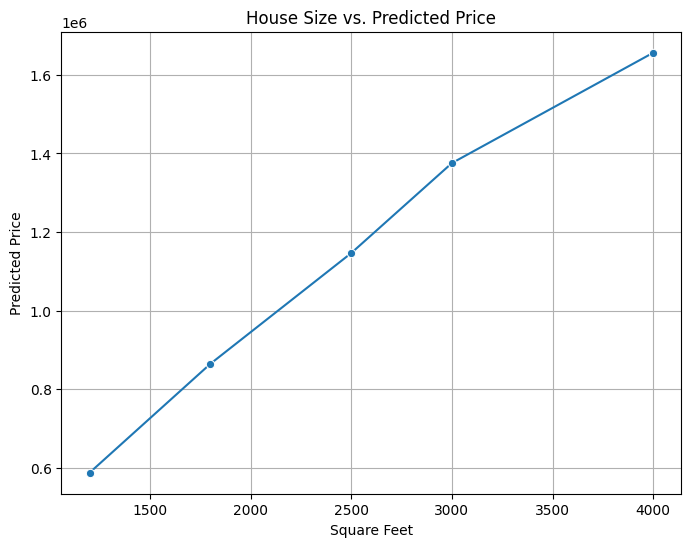

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.lineplot(x=new_houses['square_feet'], y=new_houses['Predicted Price'], marker='o', linestyle='-')

plt.xlabel("Square Feet")
plt.ylabel("Predicted Price")
plt.title("House Size vs. Predicted Price")
plt.grid(True)
plt.show()


In [ ]:
# Generate 200 new sample houses for prediction
new_houses = pd.DataFrame({
    'square_feet': np.random.randint(800, 5000, 200),
    'bedrooms': np.random.randint(1, 6, 200),
    'bathrooms': np.random.randint(1, 4, 200),
    'location_score': np.random.randint(1, 11, 200)
})

# Show first few rows
print(new_houses.head())


   square_feet  bedrooms  bathrooms  location_score
0         4358         2          2               7
1         2380         3          3               7
2         1761         3          3               3
3         4647         5          3               7
4         4375         3          3               1


In [ ]:
new_houses_scaled = scaler.transform(new_houses)

# Predict prices using the trained model
new_houses['Predicted Price'] = model.predict(new_houses_scaled)

# Show predictions
print(new_houses.head())

   square_feet  bedrooms  bathrooms  location_score  Predicted Price
0         4358         2          2               7       1581246.94
1         2380         3          3               7       1038004.72
2         1761         3          3               3        803553.66
3         4647         5          3               7       1842592.18
4         4375         3          3               1       1559822.19


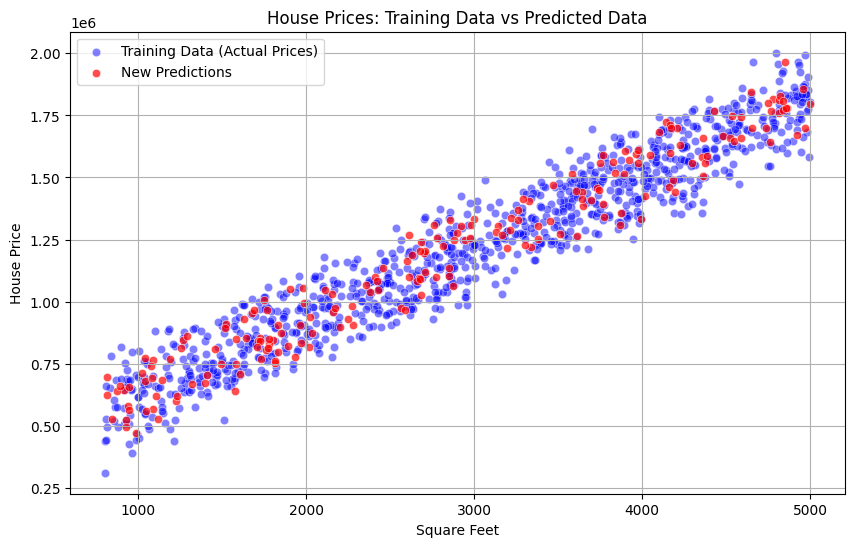

In [ ]:


# Create a plot
plt.figure(figsize=(10, 6))

# Plot original training data (actual prices)
sns.scatterplot(x=df['square_feet'], y=df['price'], color='blue', alpha=0.5, label="Training Data (Actual Prices)")

# Plot new data (predicted prices)
sns.scatterplot(x=new_houses['square_feet'], y=new_houses['Predicted Price'], color='red', alpha=0.7, label="New Predictions")

# Labels & Title
plt.xlabel("Square Feet")
plt.ylabel("House Price")
plt.title("House Prices: Training Data vs Predicted Data")
plt.legend()
plt.grid(True)

# Show plot
plt.show()


In [ ]:
!pip install gradio scikit-learn joblib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.2/46.2 MB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.2/322.2 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 3.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 39.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.3/62.3 kB 3.3 MB/s eta 0:00:00


In [ ]:
import joblib

# Assume your trained model is called "rf_model"
joblib.dump(model, "house_price_model.pkl")


['house_price_model.pkl']

In [ ]:
import joblib

model = joblib.load("house_price_model.pkl")


In [ ]:
def predict_house_price(square_feet, bedrooms, bathrooms, location_score):
    # Convert input to an array
    input_features = np.array([[square_feet, bedrooms, bathrooms, location_score]])

    # Predict price
    predicted_price = model.predict(input_features)[0]

    return f"Predicted House Price: ${predicted_price:,.2f}"

In [ ]:
import gradio as gr

interface = gr.Interface(
    fn=predict_house_price,
    inputs=[
        gr.Number(label="Square Footage"),
        gr.Number(label="Bedrooms"),
        gr.Number(label="Bathrooms"),
        gr.Number(label="Location Score (1-10)")
    ],
    outputs="text",
    title="House Price Prediction",
    description="Enter house details to predict the price."
)

# Launch the Gradio App
interface.launch()

Running Gradio in a Colab notebook requires sharing enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://de7af9b3da533cbb0b.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
